<a href="https://colab.research.google.com/github/pickachu17/Data-ScienceAIML/blob/main/Gold_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and pre processing

In [2]:
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')


In [4]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basin information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:


1. Positive Correlation
2. Negative Correlation


In [14]:
# Convert date column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Drop rows with missing or non-numeric values
gold_data = gold_data.dropna()

# Calculate correlation
correlation = gold_data.corr()

<Axes: >

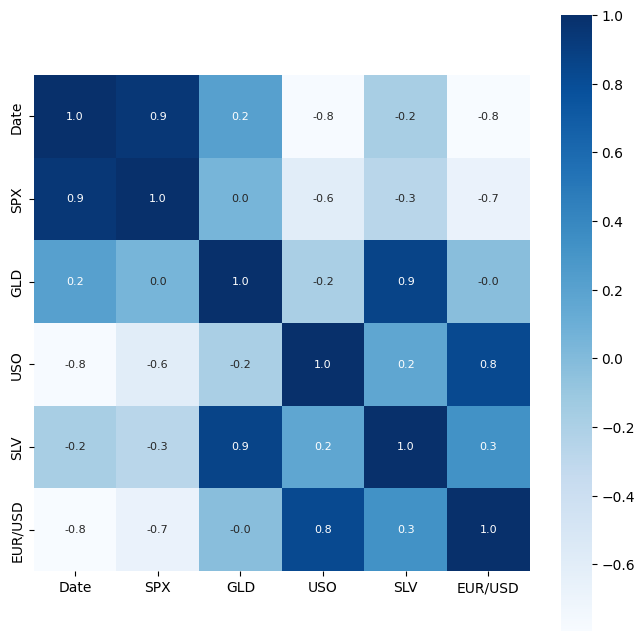

In [20]:
 #constructing a heatmap to understand the correlation
 plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-22-8ec67587274e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

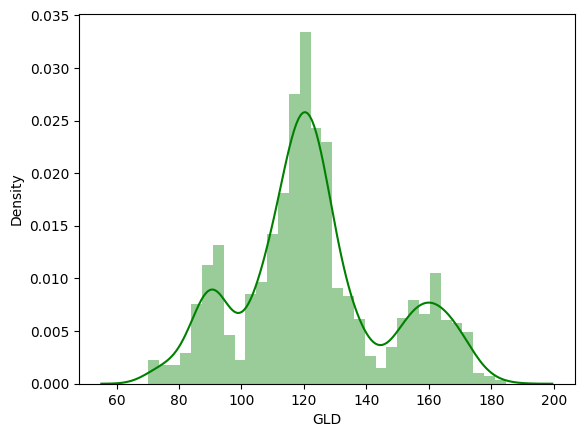

In [22]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and target

In [25]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting into Training data and Test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training
Random Forest Regressor

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [30]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.72599949  81.74429986 115.94260003 127.72970105 120.76520125
 154.66899808 150.12329847 125.95160042 117.37969872 125.90590073
 116.52050088 171.77630098 140.96139839 167.69399851 115.10829981
 117.68360072 137.62820343 169.65100073 159.293003   155.44739991
 155.01859996 125.19860033 176.10889979 157.43790409 125.17830036
  93.64409942  77.75410031 120.69110006 119.02569876 167.46769953
  88.07170034 125.3122004   91.21960092 117.79069971 121.19959886
 135.88510075 115.6838011  115.2307008  146.98869967 107.48610119
 103.95360239  87.25159768 126.5326006  117.83120061 153.06589908
 119.76530008 108.43329977 108.14589839  93.21870047 127.36859697
  75.18670003 113.73689949 121.19070026 111.38079946 118.90949877
 120.76879913 159.17150004 168.73690143 147.25239712  85.7748984
  94.2158004   86.79689899  90.77100039 119.01900079 126.44030121
 127.56089972 169.48959937 122.35069932 117.35959905  98.57970023
 168.45710221 142.92349858 132.3238029  121.31800251 120.82809934
 119.704300

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9887885153655034


Compare the Actual Values and predicted in a plot

In [34]:
Y_test = list(Y_test)

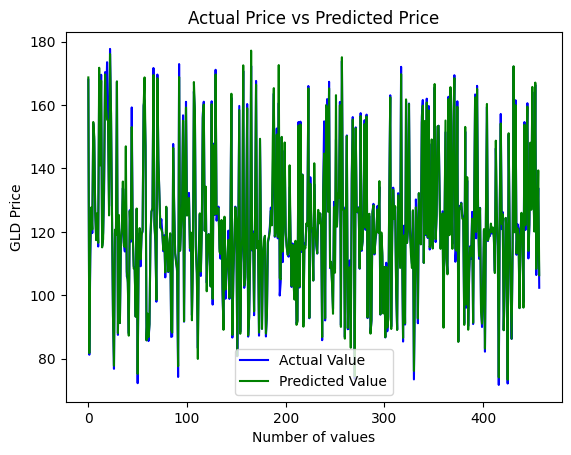

In [37]:
plt.plot(Y_test, color='blue', label = "Actual Value")
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()